<a href="https://colab.research.google.com/github/lahiruC22/nature-inspired-algorithms/blob/main/ant_colony_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ant Colony Optimization Algorithm for Traveling Salesman Problem.

## 1. Introduction

### 1.1 Overview of Travelling Salesman Problem

<p align="justify"> The traveling salesman problem asks: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the origin city?"</p>

<p align="justify">The TSP is the most iconic challenge in computational complexity theory. This problem is classified as an NP-hard problem in combinatorial optimization. This means TSP is a problem in the class of a computationally intense challenge where no known efficient algorithm can find an optimal solution for all cases ensuring the generalization of the problem. This computational complexity occurs because when the number of cities increases, the computational efforts required to solve the TSP grow exponentially, making exact solutions impractical for a large-scale instance. This complexity leads the TSP to become a benchmark for testing and developing a wide variety of new algorithms, specifically heuristics and metaheuristics approaches that prioritize near-optimal solutions within reasonable timeframes.</p>  

### 1.2 Introduction to Ant Colony Optimization Algorithm
<p align="justify">Ant Colony Optimization is a nature-inspired metaheuristic algorithm that mimics the foraging behavior of real ants. Ants have the natural ability to find the shortest path between their nest and food sources. This ability provides a powerful framework for solving complex optimization problems like TSP which has the exact goal the natural ants have i.e. find the shortest route. In ACO, we simulate the ants' collaborative behavior to find the shortest route by leveraging stochastic decision-making, positive feedback, and self-organization. Like the natural ant system, the artificial ant system also balances the exploration of new solutions and exploitation of known good paths. This notebook explores the implementation of ACO to solve the most iconic traveling salesman problem. We focus on:</p>

1. The core components of ACO
2. Demonstrate how artificial ants construct solutions using pheromone trails and heuristic information.
3. Visualize the evolution of solutions and pheromone dynamics.
4. Analyze the impact of key parameters.


By the end, you will understand how biological inspiration translates into a robust computational tool for tackling one of optimization’s most enduring challenges.

## 2. Problem Setup

### 2.1 Setting up the environment

<p align="justify">The following libraries are used to implement the ACO algorithm.</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### 2.2 Formulation of the TSP
<p align="justify">The TSP Problem is defined by specifying the number of cities, defining their coordinates, calculating the distances, and visualizing the initial setup.</p>

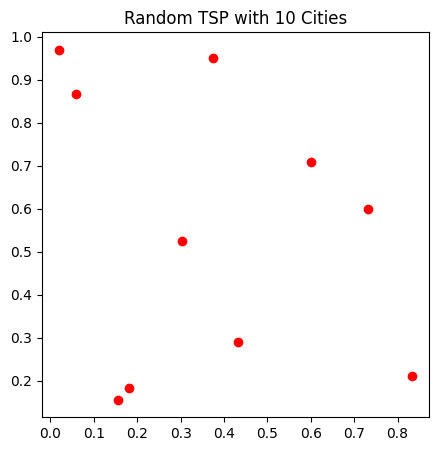

In [11]:
# Generate random cities
n_cities = 10
np.random.seed(42)
cities = np.random.rand(n_cities,2)

# Distance matrix (Euclidean distance)
distances = np.zeros((n_cities, n_cities))
for first_city in range(n_cities):
    for second_city in range(n_cities):
        distances[first_city,second_city] = np.linalg.norm(cities[first_city] - cities[second_city])

# Plot initial cities
plt.figure(figsize=(5,5))
plt.scatter(cities[:,0], cities[:,1], color='red')
plt.title(f'Random TSP with {n_cities} Cities')
plt.show()

## 3. ACO Algorithm breakdown

<p align="justify">The following core concepts of ACO was inspired and translates from the biological ants. We will map these components to their role in solving Travelling Salesman Problem.</p>

### 3.1 Key components of ACO algorithm
* **Pheromone Trails** : Ants leave pheromones on the trails they follow. The more pheromones on a path, the more likely other ants are to follow it.  
* **Heuristic Information**: Problem-specific knowledge. In TSP, this is typically the inverse of the distance between cities.
* **Pheromone Evaporation**  

### 3.2 Initialize parameters